In [98]:
import pandas as pd
df = pd.read_csv('clinicaltrial_2021.csv',sep = "|")
df.head()

,Id,Sponsor,Status,Start,Completion,Type,Submission,Conditions,Interventions
0,NCT02758028,The University of Hong Kong,Recruiting,Aug 2005,Nov 2021,Interventional,Apr 2016,NaN,NaN
1,NCT02751957,Duke University,Completed,Jul 2016,Jul 2020,Interventional,Apr 2016,"Autistic Disorder,Autism Spectrum Disorder",NaN
2,NCT02758483,Universidade Federal do Rio de Janeiro,Completed,Mar 2017,Jan 2018,Interventional,Apr 2016,Diabetes Mellitus,NaN
3,NCT02759848,Istanbul Medeniyet University,Completed,Jan 2012,Dec 2014,Observational,May 2016,"Tuberculosis,Lung Diseases,Pulmonary Disease",NaN
4,NCT02758860,University of Roma La Sapienza,"Active, not recruiting",Jun 2016,Sep 2020,Observational [Patient Registry],Apr 2016,"Diverticular Diseases,Diverticulum,Diverticulosis",NaN


In [10]:
df['Id'].count()

387261

In [12]:
#type of study
df["Type"].value_counts()

Interventional                      301472
Observational                        77540
Observational [Patient Registry]      8180
Expanded Access                         69
Name: Type, dtype: int64

In [23]:
common_disease = df["Conditions"].value_counts()[:5].to_frame().reset_index() #converting to data frame

In [24]:
common_disease.columns = ["condition","frequency"]

In [25]:
common_disease

,condition,frequency
0,Diabetes Mellitus,7460
1,Breast Neoplasms,6054
2,Carcinoma,3788
3,Prostatic Neoplasms,3700
4,COVID-19,3118


In [33]:
df["Sponsor"].value_counts()[:10] #most common sponsor with number of clinical trail they have sponsored

GlaxoSmithKline                            3378
National Cancer Institute (NCI)            3218
AstraZeneca                                2691
Pfizer                                     2645
M.D. Anderson Cancer Center                2414
Assistance Publique - Hôpitaux de Paris    2369
Mayo Clinic                                2300
Merck Sharp & Dohme Corp.                  2243
Assiut University                          2154
Novartis Pharmaceuticals                   2088
Name: Sponsor, dtype: int64

In [113]:
new = df['Completion'].value_counts().to_frame()
new.reset_index(inplace=True)

In [114]:
new.columns = ["date",'freq']
new

,date,freq
0,Dec 2021,9968
1,Dec 2022,7274
2,Dec 2020,5923
3,Dec 2019,5139
4,Dec 2018,4456
...,...,...
756,Oct 2077,1
757,Sep 2052,1
758,Jul 1979,1
759,Apr 2049,1


In [115]:
new['year'] = new['date'].apply(lambda x:x.split()[-1])

In [116]:
new

,date,freq,year
0,Dec 2021,9968,2021
1,Dec 2022,7274,2022
2,Dec 2020,5923,2020
3,Dec 2019,5139,2019
4,Dec 2018,4456,2018
...,...,...,...
756,Oct 2077,1,2077
757,Sep 2052,1,2052
758,Jul 1979,1,1979
759,Apr 2049,1,2049


In [130]:
data = new[new['year']=='2021'].reset_index().drop('index',axis=1)
data[["date","freq"]]

,date,freq
0,Dec 2021,9968
1,Jun 2021,3102
2,Sep 2021,2901
3,Oct 2021,2514
4,Mar 2021,2447
5,Jul 2021,2408
6,Aug 2021,2303
7,May 2021,2112
8,Jan 2021,2111
9,Apr 2021,2029


In [133]:
import matplotlib.pyplot as plt

In [141]:
table = data[["date","freq"]]
table['date'] = table['date'].apply(lambda x:x.split()[0])
table

C:\Users\kumaw\AppData\Local\Temp\ipykernel_7528\4110755864.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['date'] = table['date'].apply(lambda x:x.split()[0])


,date,freq
0,Dec,9968
1,Jun,3102
2,Sep,2901
3,Oct,2514
4,Mar,2447
5,Jul,2408
6,Aug,2303
7,May,2112
8,Jan,2111
9,Apr,2029


In [156]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
"Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
table['date'] = pd.Categorical(table['date'], categories=months, ordered=True)
table.sort_values(by='date',inplace=True)

C:\Users\kumaw\AppData\Local\Temp\ipykernel_7528\3929264989.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['date'] = pd.Categorical(table['date'], categories=months, ordered=True)
C:\Users\kumaw\AppData\Local\Temp\ipykernel_7528\3929264989.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table.sort_values(by='date',inplace=True)


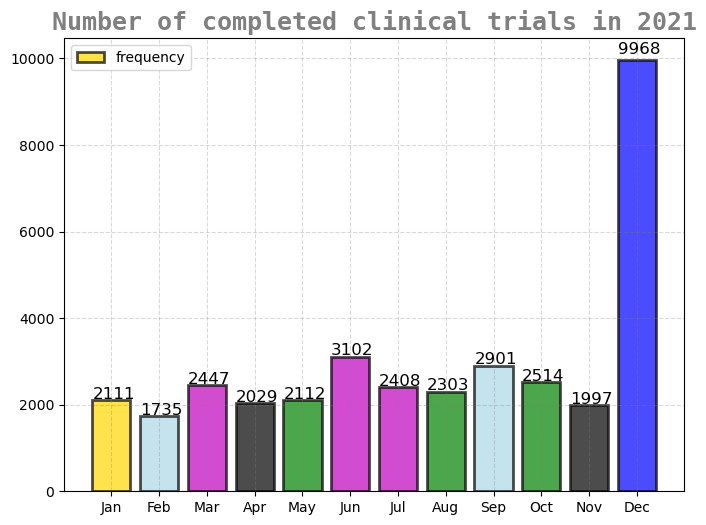

In [208]:
fig,ax = plt.subplots(figsize=(8,6),dpi =100)

bar_obj=ax.bar(x = 'date',height= 'freq',data=table,alpha=0.7,label = 'frequency')
ax.set_title("Number of completed clinical trials in 2021",font='monospace',fontweight='bold',fontsize=18,color='Grey')
for obj in bar_obj:
    obj.set_color(np.random.choice(['r','g','b','k','y','m','gold','lightblue']))
    obj.set_edgecolor('k')
    obj.set_lw(2)
    height = obj.get_height()
    x = obj.get_x()
    ax.text(x,height+height*0.013,height,fontsize=12)

ax.legend(loc='upper left')

ax.grid(color='grey',ls='--',alpha=0.3)

plt.show()

In [104]:
x = 'aditya kumawwat'
x[-4:]

'wwat'

In [109]:
df["Completion"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 387261 entries, 0 to 387260
Series name: Completion
Non-Null Count   Dtype 
--------------   ----- 
374001 non-null  object
dtypes: object(1)
memory usage: 3.0+ MB


In [111]:
def result(n):
    return n[-4:]

In [112]:
df["year"] = df['Completion'].apply(result)

TypeError: 'float' object is not subscriptable

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387261 entries, 0 to 387260
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Id             387261 non-null  object
 1   Sponsor        387261 non-null  object
 2   Status         387261 non-null  object
 3   Start          387261 non-null  object
 4   Completion     374001 non-null  object
 5   Type           387261 non-null  object
 6   Submission     387261 non-null  object
 7   Conditions     322130 non-null  object
 8   Interventions  133424 non-null  object
dtypes: object(9)
memory usage: 26.6+ MB


In [27]:
pharma = pd.read_csv('pharma.csv')
pharma.head()

,Company,Parent_Company,Penalty_Amount,Subtraction_From_Penalty,Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting,Penalty_Year,Penalty_Date,Offense_Group,Primary_Offense,Secondary_Offense,...,NAICS_Code,NAICS_Translation,HQ_Country_of_Parent,HQ_State_of_Parent,Ownership_Structure,Parent_Company_Stock_Ticker,Major_Industry_of_Parent,Specific_Industry_of_Parent,Info_Source,Notes
0,Abbott Laboratories,Abbott Laboratories,"$5,475,000",$0,"$5,475,000",2013,20131227,government-contracting-related offenses,False Claims Act and related,kickbacks and bribery,...,NaN,NaN,USA,Illinois,publicly traded,ABT,pharmaceuticals,pharmaceuticals,https://www.justice.gov/opa/pr/abbott-laborato...,NaN
1,Abbott Laboratories Inc.,AbbVie,"$1,500,000,000",$0,"$1,500,000,000",2012,20120507,healthcare-related offenses,off-label or unapproved promotion of medical p...,NaN,...,NaN,NaN,USA,Illinois,publicly traded,ABBV,pharmaceuticals,pharmaceuticals,http://www.justice.gov/opa/pr/abbott-labs-pay-...,NaN
2,Abbott Laboratories Inc.,AbbVie,"$126,500,000",$0,"$126,500,000",2010,20101207,government-contracting-related offenses,False Claims Act and related,NaN,...,NaN,NaN,USA,Illinois,publicly traded,ABBV,pharmaceuticals,pharmaceuticals,https://www.justice.gov/opa/pr/pharmaceutical-...,NaN
3,"Abbott Laboratories Puerto Rico, Inc.",Abbott Laboratories,"$49,045",$0,"$49,045",2009,20090305,employment-related offenses,wage and hour violation,Fair Labor Standards Act,...,423450.0,"423450: Medical, Dental, and Hospital Equipmen...",USA,Illinois,publicly traded,ABT,pharmaceuticals,pharmaceuticals,"March 7, 2017 download of a dataset posted by ...",Date and year are the Findings End Date in the...
4,Acclarent Inc.,Johnson & Johnson,"$18,000,000",$0,"$18,000,000",2016,20160722,government-contracting-related offenses,False Claims Act and related,NaN,...,NaN,NaN,USA,New Jersey,publicly traded,JNJ,pharmaceuticals,pharmaceuticals,https://www.justice.gov/opa/pr/johnson-johnson...,NaN


In [29]:
mesh = pd.read_csv('mesh.csv')
mesh.head(50)

,term,tree
0,Calcimycin,D03.633.100.221.173
1,A-23187,D03.633.100.221.173
2,Temefos,D02.705.400.625.800
3,Temefos,D02.705.539.345.800
4,Temefos,D02.886.300.692.800
5,Abate,D02.705.400.625.800
6,Abate,D02.705.539.345.800
7,Abate,D02.886.300.692.800
8,Difos,D02.705.400.625.800
9,Difos,D02.705.539.345.800
